In [1]:
import numpy as np
from pandas_datareader import data as wb
import pandas as pd
import yfinance as yf 
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Expected Return')

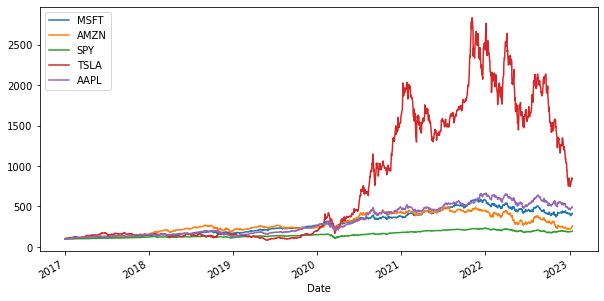

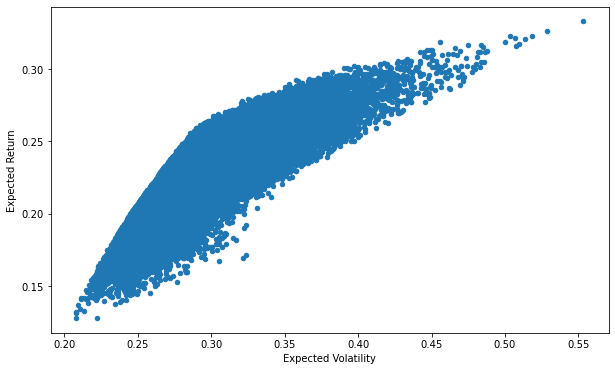

In [2]:
#Markowitz Efficient Frontier
portfolio_assets = ['MSFT','AMZN','SPY','TSLA','AAPL']
portfolio_data = pd.DataFrame()
for a in portfolio_assets:
    portfolio_data[a] = (yf.download(a, start= datetime(2017,1,1),interval='1d')['Adj Close'])
     
(portfolio_data / portfolio_data.iloc[0] * 100).plot(figsize = (10, 5))
portfolio_log_returns = np.log(portfolio_data / portfolio_data.shift(1))

portfolio_weights = np.random.random(len(portfolio_assets))
portfolio_weights /= np.sum(portfolio_weights)

portfolio_returns = []
portfolio_volatility = []
portfolios_weights = []
asset_weights = []
for x in range(100000):
    portfolio_weights = np.random.random(len(portfolio_assets))
    portfolio_weights /= np.sum(portfolio_weights)
    portfolio_returns.append(np.sum(portfolio_weights * portfolio_log_returns.mean())*250)
    portfolio_volatility.append(np.sqrt(np.dot(portfolio_weights.T,np.dot(portfolio_log_returns.cov()*250, portfolio_weights))))
    asset_weights.append(portfolio_weights)
    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)
portfolio_returns, portfolio_volatility

df_structure = {'Return' : portfolio_returns, 'Volatility' : portfolio_volatility}
for i, asset in enumerate(portfolio_assets):
    df_structure[asset] = [weight[i] for weight in asset_weights]
    
portfolios_all_assets = pd.DataFrame(df_structure)

portfolios_all_assets.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [3]:
#Efficient Frontier Data Table
portfolios_all_assets

,Return,Volatility,MSFT,AMZN,SPY,TSLA,AAPL
0,0.209127,0.277405,0.150089,0.269490,0.241170,0.172713,0.166539
1,0.231884,0.311719,0.278830,0.008930,0.343010,0.336578,0.032651
2,0.251947,0.352922,0.057417,0.376186,0.013951,0.363316,0.189130
3,0.198380,0.251602,0.305739,0.129551,0.327186,0.082806,0.154717
4,0.215856,0.293942,0.065997,0.096743,0.400633,0.289238,0.147389
...,...,...,...,...,...,...,...
99995,0.263573,0.333906,0.225468,0.142815,0.050387,0.333203,0.248127
99996,0.214447,0.270532,0.225791,0.211486,0.206407,0.128217,0.228100
99997,0.220382,0.283642,0.236366,0.170520,0.242246,0.211913,0.138955
99998,0.210484,0.287905,0.374047,0.411622,0.054034,0.109839,0.050459


In [4]:
#Sharpe Ratio
portfolio_sharpe_ratio = portfolio_returns / portfolio_volatility
mean_variance = portfolio_sharpe_ratio.max()
print(mean_variance)

0.8962055027109975


In [5]:
#Portfolio Weights and Return/Risk
portfolios_all_assets[(portfolios_all_assets['Return']/portfolios_all_assets['Volatility'])==((portfolios_all_assets['Return']/portfolios_all_assets['Volatility']).max())]

,Return,Volatility,MSFT,AMZN,SPY,TSLA,AAPL
5949,0.259299,0.28933,0.444807,0.001694,0.004867,0.10869,0.439942


In [6]:
#Correlation Matrix
portfolio_data.corr()

,MSFT,AMZN,SPY,TSLA,AAPL
MSFT,1.000000,0.887773,0.981852,0.931035,0.976271
AMZN,0.887773,1.000000,0.861694,0.801606,0.839740
SPY,0.981852,0.861694,1.000000,0.937984,0.969899
TSLA,0.931035,0.801606,0.937984,1.000000,0.957930
AAPL,0.976271,0.839740,0.969899,0.957930,1.000000


In [7]:
#Covariation Matrix
portfolio_data.cov()

,MSFT,AMZN,SPY,TSLA,AAPL
MSFT,6845.286212,3081.047554,6242.514951,8850.769878,3904.171067
AMZN,3081.047554,1759.547280,2777.611345,3863.500327,1702.582701
SPY,6242.514951,2777.611345,5905.212234,8281.950465,3602.525363
TSLA,8850.769878,3863.500327,8281.950465,13201.969180,5320.051601
AAPL,3904.171067,1702.582701,3602.525363,5320.051601,2336.283274
